Task#1
# **TASK#1**
---



Создать спарк сессию.

In [88]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
import pandas as pd
from random import randint

from pyspark.sql import Row
from pyspark.sql import SparkSession


In [90]:
spark_session = SparkSession.builder.getOrCreate()

Прочитать датасет в датафрейм.

In [91]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType

In [92]:
schema = StructType([
    StructField("Name", StringType(), True),
    StructField("Author", StringType(), True),
    StructField("User Rating", FloatType(), True),
    StructField("Reviews", IntegerType(), True),
    StructField("Price", IntegerType(), True),
    StructField("Year", IntegerType(), True),
    StructField("Genre", StringType(), True),
    # Add more columns as needed
])

In [93]:
df_books = spark_session.read \
    .format("csv") \
    .option("header", "true") \
    .schema(schema) \
    .load("bestsellers with categories.csv")

In [94]:
df_books.summary().show()

+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|summary|                Name|          Author|        User Rating|           Reviews|             Price|              Year|      Genre|
+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|  count|                 550|             550|                550|               550|               550|               550|        550|
|   mean|                null|            null| 4.6183636452934955|11953.281818181818|              13.1|            2014.0|       null|
| stddev|                null|            null|0.22698038875323445|11731.132017431892|10.842261978422364|3.1651563841692782|       null|
|    min|"The Plant Parado...|Abraham Verghese|                3.3|                37|                 0|              2009|    Fiction|
|    25%|                null|           

In [95]:
df_books.show(50)

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

Используя только RDD вычислить среднюю цену всех книг, у которых рейтинг выше 4.7

In [96]:
rdd_books = df_books.rdd

In [97]:
rdd_books_filtered = rdd_books.filter(lambda x: float(x['User Rating']) > 4.7)

In [98]:
rdd_prices = rdd_books_filtered.map(lambda x: float(x['Price']))

In [99]:
rdd_prices.count()

179

In [100]:
mean_price = rdd_prices.reduce(lambda a, b: a + b) / rdd_prices.count()

In [101]:
mean_price

10.69832402234637

Построить гистограмму распределения рецензий (столбец Reviews)

In [102]:
!pip install pandas matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [103]:
import pandas as pd
import matplotlib.pyplot as plt


In [104]:
pandas_DF= df_books.toPandas()

In [105]:
pandas_DF

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


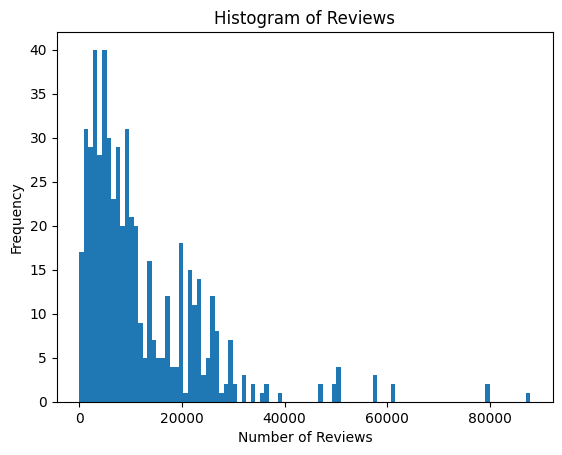

In [106]:

plt.hist(pandas_DF['Reviews'], bins=100)
plt.title('Histogram of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

Построить матрицу корреляции для столбцов "User Rating", "Reviews" и "Price".

In [107]:
coor_matrix = pandas_DF[['User Rating','Reviews', 'Price']].corr()

In [108]:
coor_matrix


,User Rating,Reviews,Price
User Rating,1.000000,-0.001729,-0.133086
Reviews,-0.001729,1.000000,-0.109182
Price,-0.133086,-0.109182,1.000000


Используя библиотеку seaborn построить парные графики (pairplots) столбцов "User Rating", "Reviews" и "Price".

In [109]:
import seaborn as sns
%matplotlib inline

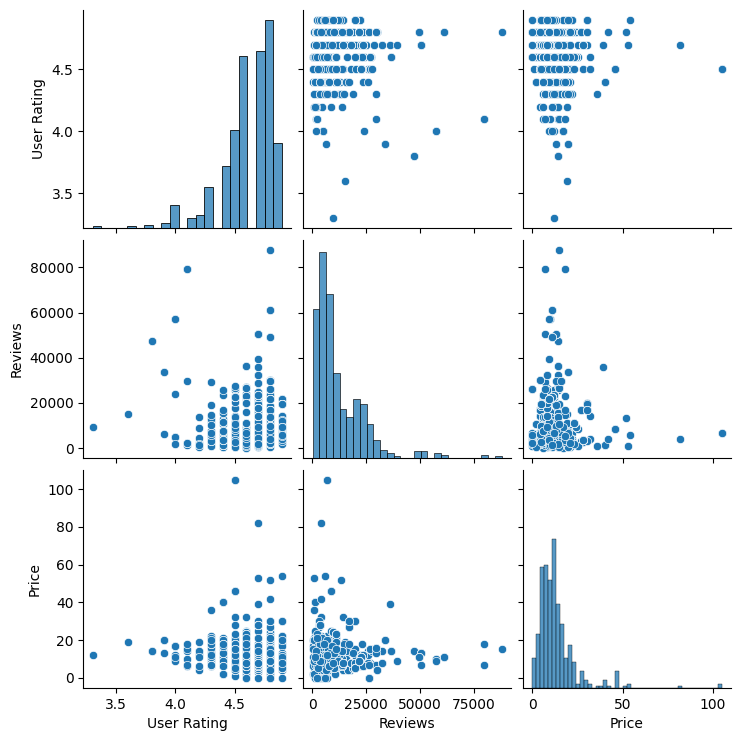

In [110]:
sns.pairplot(data=pandas_DF[['User Rating','Reviews', 'Price']])


# **TASK#2**

*При выполнении этого задания разрешается использовать только Spark SQL.*

Найдите автора с самым высоким рейтингом.

In [111]:
from pyspark.sql.functions import mean, stddev, round as _round, max as _max, min as _min

change colomn name

In [112]:
df_books.withColumnRenamed("User Rating","User_Rating").printSchema()

root
 |-- Name: string (nullable = true)
 |-- Author: string (nullable = true)
 |-- User_Rating: float (nullable = true)
 |-- Reviews: integer (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Genre: string (nullable = true)



In [113]:
max_user_rating_str = df_books.select(_max("User Rating")).toPandas().iloc[0, 0]

In [127]:

df_max_rating = df_books.withColumnRenamed("User Rating","User_Rating").select("Author", "User_Rating").where(f"User_Rating == {max_user_rating_str}").dropDuplicates().sort("Author").head(1)

In [129]:
for item in df_max_rating:
  print (f'Author: {item[0]}        | Rating: {item[1]}')

Author: Alice Schertle        | Rating: 4.900000095367432


Найдите трех авторов с самым низким рейтингом.

In [115]:
min_user_rating = df_books.select(_min("User Rating")).toPandas().iloc[0, 0]

In [116]:

df_min_rating = df_books.withColumnRenamed("User Rating","User_Rating").select("Author", "User_Rating").where(f"User_Rating == {min_user_rating}").dropDuplicates().sort("Author").show()

+------------+-----------+
|      Author|User_Rating|
+------------+-----------+
|J.K. Rowling|        3.3|
+------------+-----------+



In [117]:
min_user_rating_tail = df_books.withColumnRenamed("User Rating","User_Rating").select("Author", "User_Rating").dropDuplicates().sort("User_Rating", ascending = False ).tail(3)

In [118]:
for item in min_user_rating_tail:
  print (f'Author: {item[0]}        | Rating: {item[1]}')

Author: E L James        | Rating: 3.799999952316284
Author: Harper Lee        | Rating: 3.5999999046325684
Author: J.K. Rowling        | Rating: 3.299999952316284


Определите какой автор получил наибольшее количество рецензий.

In [119]:
max_reviews = df_books.select(_max("Reviews")).toPandas().iloc[0, 0]

In [120]:
max_reviews

87841

In [121]:

df_max_reviews = df_books.select("Author", "Reviews").where(f"Reviews == {max_reviews}").dropDuplicates().sort("Author").show()

+-----------+-------+
|     Author|Reviews|
+-----------+-------+
|Delia Owens|  87841|
+-----------+-------+



Определите какой автор написал наибольшее количество книг за весь доступный в данных период.

In [134]:
from pyspark.sql.functions import count

In [139]:
author_max_written_books = df_books.select("Name", "Author") \
    .groupBy("Author") \
    .agg(count("Name").alias("NumBooks"))\
    .sort("NumBooks", ascending = False)

In [141]:
author_max_written_books.show(1)

+-----------+--------+
|     Author|NumBooks|
+-----------+--------+
|Jeff Kinney|      12|
+-----------+--------+
only showing top 1 row



Определите какая книга жанра "Fiction" имеет самый маленький рейтинг.

In [146]:
from pyspark.sql.functions import col

In [155]:
fiction_min_rating = df_books.select("Name", "Genre", "User Rating") \
    .where(col("Genre") == "Fiction") \
    .sort("User Rating", ascending = True) \
    .show(1)

+------------------+-------+-----------+
|              Name|  Genre|User Rating|
+------------------+-------+-----------+
|The Casual Vacancy|Fiction|        3.3|
+------------------+-------+-----------+
only showing top 1 row



Определите какая книга жанра "Non Fiction" имеет самый высокий рейтинг.

In [157]:
non_fiction_max_rating = df_books.select("Name", "Genre", "User Rating") \
    .where(col("Genre") == "Non Fiction") \
    .sort("User Rating", ascending = False) \
    .show(1)

+--------------------+-----------+-----------+
|                Name|      Genre|User Rating|
+--------------------+-----------+-----------+
|Hamilton: The Rev...|Non Fiction|        4.9|
+--------------------+-----------+-----------+
only showing top 1 row



# **TASK#3**

Постройте гистограмму среднего количества рецензий по годам. 

In [205]:
mean_reviews_by_years = df_books.select("Reviews", "Year") \
    .groupBy("Year") \
    .agg(mean("Reviews").alias("Mean_Reviews")) \
    .sort("Year", ascending = True)
   
    

In [206]:
mean_reviews_by_years.show()

+----+------------+
|Year|Mean_Reviews|
+----+------------+
|2009|     4710.12|
|2010|     5479.62|
|2011|     8100.82|
|2012|    13090.92|
|2013|    13098.14|
|2014|    15859.94|
|2015|    14233.38|
|2016|     14196.0|
|2017|     12888.4|
|2018|    13930.42|
|2019|    15898.34|
+----+------------+



In [207]:
pandas_mean_rev_year = mean_reviews_by_years.toPandas()

In [208]:
years = pandas_mean_rev_year.iloc[:,0].tolist()

In [209]:
reviews = pandas_mean_rev_year.iloc[:,1].tolist()

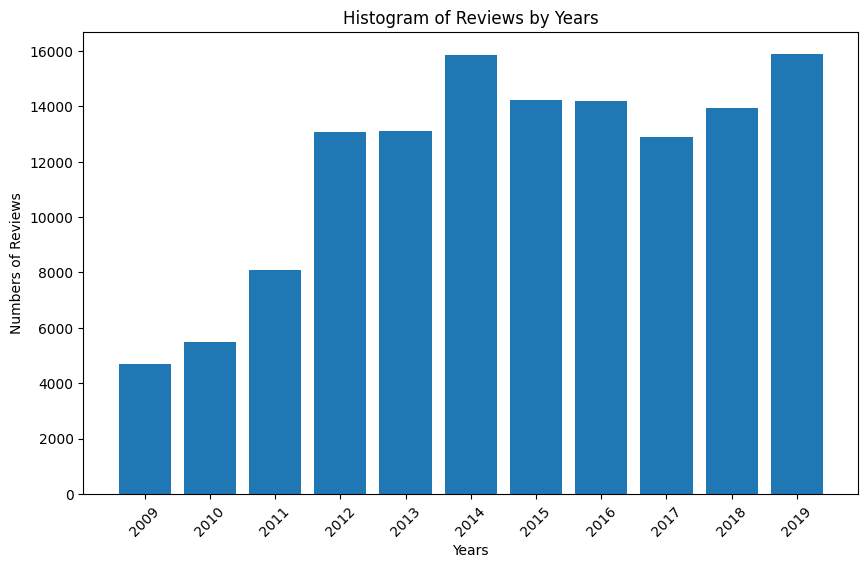

In [228]:
plt.figure(figsize=(10,6))
plt.bar(years, reviews)
plt.title('Histogram of Reviews by Years')
plt.xlabel('Years')
plt.ylabel('Numbers of Reviews')
plt.xticks(range(min(years), max(years) + 1), rotation=45)
plt.show()

В виде отдельной гистограммы визуализируйте количество книг жанра "Fiction" и "Non Fiction" за весь доступный период.

In [216]:
genre_counts = df_books.select("Genre") \
    .groupBy("Genre") \
    .agg(count("Genre").alias("Number")) 
   

In [217]:
genre_counts.show()

+-----------+------+
|      Genre|Number|
+-----------+------+
|    Fiction|   240|
|Non Fiction|   310|
+-----------+------+



In [223]:
genre = genre_counts.toPandas().iloc[:,0].tolist()

In [226]:
number = genre_counts.toPandas().iloc[:,1].tolist()

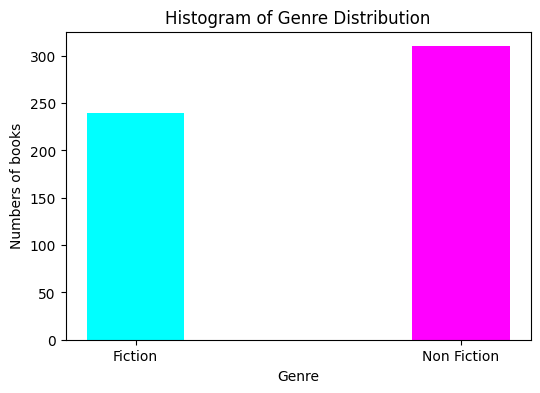

In [238]:
plt.figure(figsize=(6,4))
bar_colors = ['cyan', 'magenta']
plt.bar(genre, number, width=0.3, color=bar_colors)
plt.title('Histogram of Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Numbers of books')

plt.show()